In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import plotly.express as px 
from scipy.stats import zscore
from collections import defaultdict
from textwrap import fill


In [2]:
cons = pd.read_csv(r"C:\Users\Admin\Downloads\constituents.csv")
cons["Ticker"] = cons["Symbol"].astype(str).str.replace(".", "-", regex=False).str.strip()
cons

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded,Ticker
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902,MMM
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916,AOS
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888,ABT
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888),ABBV
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989,ACN
...,...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011,XYL
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997,YUM
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969,ZBRA
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927,ZBH


In [3]:
prices = pd.read_csv(r"C:\Users\Admin\Downloads\prices_492.csv", parse_dates=['Date'])
prices

,Date,A,AAPL,ABBV,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XYL,XYZ,YUM,ZBH,ZBRA,ZTS
0,2020-03-19,63.155087,59.257923,56.155106,67.294357,25.731314,145.760605,307.510010,81.822792,28.615883,...,13.241268,45.369186,48.900967,26.664165,60.377602,40.000000,56.470531,82.637718,185.070007,97.755379
1,2020-03-20,63.827347,55.495899,54.384941,61.423061,24.694834,137.888672,295.339996,77.075768,26.178490,...,12.109116,50.619068,42.694534,25.355352,56.097019,38.090000,52.393112,79.708221,179.380005,96.427521
2,2020-03-23,60.859756,54.316936,50.971069,56.744057,22.117901,132.140976,307.269989,77.148239,25.066692,...,11.050797,56.073505,42.163273,24.356321,53.052849,40.009998,50.985859,74.915344,170.720001,88.517677
3,2020-03-24,64.346001,59.766308,53.333904,62.949589,24.343002,144.243240,310.000000,84.911995,27.640926,...,13.848365,64.829819,45.578491,27.446356,58.073391,46.310001,62.839252,86.586967,180.550003,99.121460
4,2020-03-25,66.266762,59.437069,53.665821,63.907066,24.457109,139.617554,305.910004,85.482704,27.965910,...,14.537503,73.108871,46.843391,28.879078,59.815590,52.389999,65.734955,89.766769,186.229996,103.372505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2024-12-24,135.004913,257.286652,173.918808,112.625923,92.669998,356.539642,447.940002,215.309509,49.139256,...,27.612028,88.107307,66.017303,103.530914,117.085014,91.080002,133.063232,106.293640,395.440002,163.105957
1201,2024-12-26,134.737106,258.103729,173.145844,113.126442,92.930000,355.356506,450.160004,215.279907,49.119843,...,27.524092,88.633286,65.988274,103.618484,117.402130,91.480003,134.048904,106.244110,396.850006,163.918015
1202,2024-12-27,134.449432,254.685883,171.996048,112.851639,92.339996,351.166321,446.480011,214.223557,49.090725,...,27.348219,88.008064,65.949547,103.608765,116.470604,88.970001,133.289948,105.867661,389.070007,163.006927
1203,2024-12-30,133.338440,251.307877,170.247192,110.702370,91.889999,347.528259,445.799988,209.850037,48.595737,...,27.250511,85.179665,65.417229,102.908180,115.231865,87.480003,131.604477,104.646461,383.850006,160.669754


## Convert to Returns
Raw prices are not very useful for clustering because a $50 stock and a $500 stock can move in similar ways even though their price levels are very different. To make them comparable, I converted the prices into log returns.

In [4]:
def to_returns(prices: pd.DataFrame) -> pd.DataFrame:
    df = prices.copy()

    # If there's a Date column, make it the datetime index
    if "Date" in df.columns:
        df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
        df = df.set_index("Date")

    # Ensure index is datetime and sorted
    if not isinstance(df.index, pd.DatetimeIndex):
        # if your index is already dates as strings, this will fix it
        try:
            df.index = pd.to_datetime(df.index, errors="raise")
        except Exception:
            pass
    df = df.sort_index()

    # Keep only numeric columns (drop datetime/text columns)
    df = df.select_dtypes(include=[np.number])

    # Optional cleanup
    df = df.replace([np.inf, -np.inf], np.nan)

    # Log returns
    rets = np.log(df / df.shift(1))
    return rets.dropna(how="all")


rets = to_returns(prices)

In [5]:
rets

,A,AAPL,ABBV,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP,...,WY,WYNN,XEL,XOM,XYL,XYZ,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-20,0.010588,-0.065590,-0.032030,-0.091291,-0.041115,-0.055519,-0.040380,-0.059767,-0.089024,-0.046297,...,-0.089380,0.109495,-0.135726,-0.050331,-0.073536,-0.048928,-0.074944,-0.036093,-0.031228,-0.013677
2020-03-23,-0.047610,-0.021473,-0.064829,-0.079234,-0.110207,-0.042577,0.039600,0.000940,-0.043398,-0.027045,...,-0.091456,0.102335,-0.012521,-0.040198,-0.055794,0.049178,-0.027227,-0.062014,-0.049482,-0.085589
2020-03-24,0.055703,0.095606,0.045314,0.103783,0.095857,0.087632,0.008845,0.095887,0.097758,0.103470,...,0.225665,0.145102,0.077886,0.119442,0.090419,0.146229,0.209032,0.144791,0.055983,0.113144
2020-03-25,0.029414,-0.005524,0.006204,0.015096,0.004677,-0.032594,-0.013281,0.006699,0.011689,0.013385,...,0.048565,0.120184,0.027374,0.050884,0.029559,0.123358,0.045051,0.036066,0.030975,0.041993
2020-03-26,0.066167,0.051285,0.083582,0.069078,0.142868,0.120954,0.053339,-0.018612,0.052424,0.111573,...,0.031114,-0.048451,0.041607,0.040210,0.062962,0.067172,0.038761,0.043159,0.058807,0.085848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,0.011082,0.011413,0.008985,0.003929,0.006278,0.007940,0.002683,0.014781,0.004355,0.007822,...,0.006390,0.007575,0.007210,0.000940,0.005432,0.019849,0.008480,0.004484,0.012187,0.002553
2024-12-26,-0.001986,0.003171,-0.004454,0.004434,0.002802,-0.003324,0.004944,-0.000137,-0.000395,0.002594,...,-0.003190,0.005952,-0.000440,0.000845,0.002705,0.004382,0.007380,-0.000466,0.003559,0.004966
2024-12-27,-0.002137,-0.013331,-0.006663,-0.002432,-0.006369,-0.011862,-0.008208,-0.004919,-0.000593,-0.003539,...,-0.006410,-0.007079,-0.000587,-0.000094,-0.007966,-0.027821,-0.005678,-0.003550,-0.019799,-0.005574


## Standardize data
Each stock’s returns are scaled so they have an average of zero and a standard deviation of one.

In [6]:
def row_standardize(X: np.ndarray) -> np.ndarray:
 mu = X.mean(axis=1, keepdims=True)
 sd = X.std(axis=1, keepdims=True, ddof=0)
 sd[sd == 0.0] = 1.0
 return (X - mu) / sd

X = rets.T.values # tickers × time
Xz = row_standardize(X)

## Choose the k 
Here I want to see at which k can the silhouette score be the highest.

In [7]:
def try_ks(X: np.ndarray, ks=range(5, 12), random_state=42):
    rows = []
    for k in ks:
        km = KMeans(n_clusters=k, n_init=25, max_iter=1000, random_state=random_state)
        labels = km.fit_predict(X)
        sil = silhouette_score(X, labels, metric="euclidean")
        rows.append({"k": k, "silhouette": sil, "inertia": km.inertia_})
    return pd.DataFrame(rows)

grid = try_ks(Xz, ks=range(5, 12))
best_row = grid.sort_values(["silhouette", "k"], ascending=[False, True]).iloc[0]
best_k = int(best_row["k"])
print(grid.sort_values("silhouette", ascending=False))
print(f"Chosen K = {best_k} (silhouette={best_row['silhouette']:.3f})")

c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

    k  silhouette        inertia
6  11    0.057885  301117.046082
2   7    0.053628  317530.323711
4   9    0.051452  308437.974246
5  10    0.051197  304432.863565
0   5    0.047725  329187.478528
1   6    0.045177  323920.403071
3   8    0.039465  313044.229315
Chosen K = 11 (silhouette=0.058)


## K-Means

In [8]:
kmeans = KMeans(n_clusters=best_k, n_init=25, max_iter=1000, random_state=42)
labels = kmeans.fit_predict(Xz)

clusters = defaultdict(list)
for t, lab in zip(rets.columns, labels):
    clusters[int(lab)].append(t)

for lab in sorted(clusters):
    print(f"Cluster {lab}: {clusters[lab]}")

c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Cluster 0: ['AES', 'ALB', 'ALLE', 'AMCR', 'AME', 'AOS', 'APD', 'APH', 'APO', 'APTV', 'AVY', 'BEN', 'BLK', 'CARR', 'CAT', 'CBRE', 'CDW', 'CHRW', 'CMI', 'CSX', 'DD', 'DE', 'DOV', 'EMN', 'EMR', 'ETN', 'EXPD', 'F', 'FAST', 'FCX', 'FDX', 'FTV', 'GLW', 'GM', 'GPC', 'GRMN', 'GWW', 'HAS', 'HCA', 'HON', 'HPE', 'HPQ', 'HUBB', 'IEX', 'IFF', 'IR', 'IT', 'ITW', 'J', 'JBHT', 'JBL', 'JCI', 'KMX', 'LII', 'LIN', 'LKQ', 'MHK', 'MLM', 'MMM', 'NDSN', 'NSC', 'NTAP', 'NUE', 'NWS', 'NWSA', 'OTIS', 'PCAR', 'PH', 'PNR', 'PPG', 'PWR', 'ROK', 'SNA', 'STLD', 'SWK', 'TDY', 'TEL', 'TROW', 'TT', 'UHS', 'UNP', 'UPS', 'URI', 'VMC', 'WAB', 'WDC', 'WY', 'XYL']
Cluster 1: ['AEE', 'AEP', 'ATO', 'AWK', 'CMS', 'CNP', 'D', 'DTE', 'DUK', 'ED', 'EIX', 'ES', 'ETR', 'EVRG', 'EXC', 'FE', 'LHX', 'LMT', 'LNT', 'NEE', 'NI', 'NOC', 'NRG', 'PCG', 'PEG', 'PNW', 'PPL', 'SO', 'SRE', 'VST', 'VZ', 'WEC', 'XEL']
Cluster 2: ['ACN', 'ADP', 'AJG', 'AON', 'BALL', 'BR', 'BRO', 'BSX', 'CMCSA', 'CME', 'COO', 'CPAY', 'CSCO', 'CTAS', 'CTSH', 'ECL', 

## Visualize clusters

In [9]:
pca = PCA(n_components=2, random_state=42)
emb = pca.fit_transform(Xz)

df_plot = pd.DataFrame({
    "ticker": rets.columns,
    "pc1": emb[:, 0],
    "pc2": emb[:, 1],
    "cluster": labels.astype(int)
})

fig = px.scatter(
    df_plot, x="pc1", y="pc2",
    color=df_plot["cluster"].astype(str),
    hover_name="ticker",
    title=f"K-Means clusters on weekly return shapes (K={best_k})"
)
fig.show()

## Handle outliers and weak fits
Not every stock fits neatly into a cluster. Some might have too little data, unusual one-off moves, or just noisy patterns that throw things off. To clean things up, I run a simple pruning step.

I check three things:

- Stocks with very low silhouette scores (they do not clearly belong anywhere).
- The bottom slice of stocks inside each cluster (the weakest fits).
- Stocks that sit far away from the center of their cluster.

If a stock triggers one of these rules, I drop it from the set.

In [10]:
sil_values = silhouette_samples(Xz, labels, metric="euclidean")
centroids = kmeans.cluster_centers_
dists = np.linalg.norm(Xz - centroids[labels], axis=1)

diag = pd.DataFrame({
    "ticker": rets.columns,
    "cluster": labels.astype(int),
    "silhouette": sil_values,
    "dist_to_centroid": dists,
})
diag["dist_z_in_cluster"] = diag.groupby("cluster")["dist_to_centroid"].transform(zscore)

# Flag weak fits
diag["drop_flag"] = (
    (diag["silhouette"] < 0.0) | #record likely misclustered
    (diag.groupby("cluster")["silhouette"].transform(lambda s: s <= s.quantile(0.10))) | #10% silhouette threshold: underperformers in the cluster
    (diag["dist_z_in_cluster"].abs() > 3.0) #outliers far from the centroid (>3 std)
)

diag.head(10)

,ticker,cluster,silhouette,dist_to_centroid,dist_z_in_cluster,drop_flag
0,A,10,-0.006204,25.061546,-0.511274,True
1,AAPL,10,0.028381,24.097332,-0.802870,False
2,ABBV,5,0.029780,27.311262,-0.518666,False
3,ABT,5,-0.067020,26.251063,-1.038426,True
4,ACGL,6,0.086386,24.424590,0.285902,False
5,ACN,2,0.038570,22.607875,-0.982931,False
6,ADBE,10,0.069010,24.629199,-0.642024,False
7,ADI,10,0.025658,21.986641,-1.441179,False
8,ADM,6,-0.000754,28.522116,1.164608,True
9,ADP,2,0.036326,23.033487,-0.800981,False


## Refitting clusters after pruning

In [11]:
tickers_pruned = diag.loc[~diag["drop_flag"], "ticker"].tolist()
Xz_pruned = Xz[[rets.columns.get_loc(t) for t in tickers_pruned], :]

grid2 = try_ks(Xz_pruned, ks=range(5, 12))
best_row2 = grid2.sort_values(["silhouette", "k"], ascending=[False, True]).iloc[0]
best_k2 = int(best_row2["k"])

kmeans2 = KMeans(n_clusters=best_k2, n_init=25, max_iter=1000, random_state=42)
labels2 = kmeans2.fit_predict(Xz_pruned)

c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

In [12]:
groups = diag.groupby("cluster")["ticker"].apply(list)

#print the clusters and their members
for disp_idx, cl in enumerate(sorted(groups.index), start=1):  # 1-indexed display
    tickers = groups[cl]
    header = f"Cluster {disp_idx} ({len(tickers)}): "
    line = header + ", ".join(tickers)
    print(fill(line, width=120, subsequent_indent=" " * len(header)))


Cluster 1 (88): AES, ALB, ALLE, AMCR, AME, AOS, APD, APH, APO, APTV, AVY, BEN, BLK, CARR, CAT, CBRE, CDW, CHRW, CMI,
                CSX, DD, DE, DOV, EMN, EMR, ETN, EXPD, F, FAST, FCX, FDX, FTV, GLW, GM, GPC, GRMN, GWW, HAS, HCA, HON,
                HPE, HPQ, HUBB, IEX, IFF, IR, IT, ITW, J, JBHT, JBL, JCI, KMX, LII, LIN, LKQ, MHK, MLM, MMM, NDSN, NSC,
                NTAP, NUE, NWS, NWSA, OTIS, PCAR, PH, PNR, PPG, PWR, ROK, SNA, STLD, SWK, TDY, TEL, TROW, TT, UHS, UNP,
                UPS, URI, VMC, WAB, WDC, WY, XYL
Cluster 2 (33): AEE, AEP, ATO, AWK, CMS, CNP, D, DTE, DUK, ED, EIX, ES, ETR, EVRG, EXC, FE, LHX, LMT, LNT, NEE, NI, NOC,
                NRG, PCG, PEG, PNW, PPL, SO, SRE, VST, VZ, WEC, XEL
Cluster 3 (50): ACN, ADP, AJG, AON, BALL, BR, BRO, BSX, CMCSA, CME, COO, CPAY, CSCO, CTAS, CTSH, ECL, EW, FDS, FI, FIS,
                GPN, ICE, IQV, ISRG, JKHY, LDOS, MA, MCD, MCO, MDT, MMC, MNST, MSI, NDAQ, PAYX, ROP, RSG, SBUX, SPGI,
                STE, STZ, SYK, TMUS, V, VRSK, WM

## Visualize after-pruned cluster

In [13]:
pca2 = PCA(n_components=2, random_state=42)
emb2 = pca2.fit_transform(Xz_pruned)

df_plot2 = pd.DataFrame({
    "ticker": tickers_pruned,
    "pc1": emb2[:, 0],
    "pc2": emb2[:, 1],
    "cluster": labels2.astype(int)
})

fig2 = px.scatter(
    df_plot2, x="pc1", y="pc2",
    color=df_plot2["cluster"].astype(str),
    hover_name="ticker",
    title=f"K-Means clusters after pruning (K={best_k2})"
)
fig2.show()

## Compare 3 portfolios returns

### Cluster-based portfolio

In [15]:
chosen = ["DOV", "AWK", "AON", "TSCO", "BKNG", "VRTX", "FOX", "WMB", "HRL", "UDR", "FICO"]  

R = rets[[t for t in chosen if t in rets.columns]].dropna(how="any")

port = R.mean(axis=1)
port.name = "Cluster_1per_EW_simple"

def perf_stats(ret: pd.Series, trading_days=252):
    if ret.empty:
        return {"CAGR": np.nan, "Vol": np.nan, "Sharpe": np.nan, "MaxDD": np.nan}
    wealth = (1 + ret).cumprod()
    years = (ret.index[-1] - ret.index[0]).days / 365.25
    cagr = (wealth.iloc[-1])**(1/years) - 1 if years > 0 else np.nan
    vol  = ret.std(ddof=1) * np.sqrt(trading_days)
    ann  = ret.mean() * trading_days
    sharpe = ann / vol if vol > 0 else np.nan
    maxdd = (wealth / wealth.cummax() - 1).min()
    return {"CAGR": cagr, "Vol": vol, "Sharpe": sharpe, "MaxDD": maxdd}

print("Chosen stocks (1 per cluster)")
print(list(R.columns))
print("\nPerformance")
print(pd.Series(perf_stats(port)).round(4))

print("\nFinal returns")
print((1 + port).cumprod().iloc[-1].round(4))


Chosen stocks (1 per cluster)
['DOV', 'AWK', 'AON', 'TSCO', 'BKNG', 'VRTX', 'FOX', 'WMB', 'HRL', 'UDR', 'FICO']

Performance
CAGR      0.1997
Vol       0.1778
Sharpe    1.1141
MaxDD    -0.1923
dtype: float64

Final returns
2.3889


### SP500 portfolio

In [16]:
sp500_port = rets.copy()
sp500_port = sp500_port.dropna(how="all") # keep days with at least one stock present
sp500_port = sp500_port.mean(axis=1) # per-day average across available stocks
sp500_port.name = "SP500_portfolio"

def perf_stats(ret: pd.Series, trading_days=252):
    if ret.empty:
        return {"CAGR": np.nan, "Vol": np.nan, "Sharpe": np.nan, "MaxDD": np.nan}
    wealth = (1 + ret).cumprod()
    years = (ret.index[-1] - ret.index[0]).days / 365.25
    cagr = (wealth.iloc[-1])**(1/years) - 1 if years > 0 else np.nan
    vol  = ret.std(ddof=1) * np.sqrt(trading_days)
    ann  = ret.mean() * trading_days
    sharpe = ann / vol if vol > 0 else np.nan
    maxdd = (wealth / wealth.cummax() - 1).min()
    return {"CAGR": cagr, "Vol": vol, "Sharpe": sharpe, "MaxDD": maxdd}

print("Performance")
print(pd.Series(perf_stats(sp500_port)).round(4))
print("\nFinal returns", (1 + sp500_port).cumprod().iloc[-1].round(4))


Performance
CAGR      0.1828
Vol       0.1940
Sharpe    0.9629
MaxDD    -0.2337
dtype: float64

Final returns 2.232


### Random portfolio

In [17]:
N = 11
seed = 42  
rng = np.random.default_rng(seed)

def perf_stats(ret: pd.Series, trading_days=252):
    if ret.empty:
        return {"CAGR": np.nan, "Vol": np.nan, "Sharpe": np.nan, "MaxDD": np.nan}
    wealth = (1 + ret).cumprod()
    years = (ret.index[-1] - ret.index[0]).days / 365.25
    cagr = (wealth.iloc[-1])**(1/years) - 1 if years > 0 else np.nan
    vol  = ret.std(ddof=1) * np.sqrt(trading_days)
    ann  = ret.mean() * trading_days
    sharpe = ann / vol if vol > 0 else np.nan
    maxdd = (wealth / wealth.cummax() - 1).min()
    return {"CAGR": cagr, "Vol": vol, "Sharpe": sharpe, "MaxDD": maxdd}

universe = list(rets.columns)
if len(universe) < N:
    raise ValueError(f"Requested N={N} but only {len(universe)} tickers in rets.columns.")

random_names = list(rng.choice(universe, size=N, replace=False))
R = rets[random_names].copy()
R = R.dropna(how="all")        # keep days with at least one name present

random_port = R.mean(axis=1)
random_port.name = f"Random_EW_simple({N})"

print("Random portfolio")
print(f"Chosen stocks ({len(random_names)}): {random_names[:10]}{' ...' if len(random_names)>10 else ''}")

stats = perf_stats(random_port)
print("\nPerformance")
print(pd.Series(stats).round(4))

print("\nFinal returns", (1 + random_port).cumprod().iloc[-1].round(4))


Random portfolio
Chosen stocks (11): ['HBAN', 'MTCH', 'PSKY', 'COF', 'AVY', 'HD', 'AXP', 'TAP', 'AVB', 'OKE'] ...

Performance
CAGR      0.1629
Vol       0.2564
Sharpe    0.7168
MaxDD    -0.3514
dtype: float64

Final returns 2.0584


### Visualize the 3 portfolios

<Figure size 1000x500 with 0 Axes>

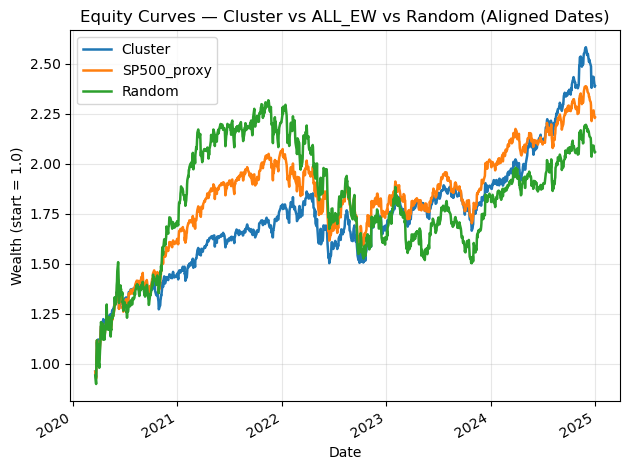

In [18]:
#rename for easy-relate
cluster_series = port        
sp500_series   = sp500_port            
random_series  = random_port   

s1 = cluster_series.rename("Cluster")
s2 = sp500_series.rename("SP500_proxy")
s3 = random_series.rename("Random")

# Inner-join to keep only dates that are available in 3 portfolios
rets_aligned = pd.concat([s1, s2, s3], axis=1).dropna()

if rets_aligned.empty:
    raise ValueError("After alignment there are no overlapping dates. "
                     "Check that each portfolio series has data and similar date ranges.")

# Cumulative wealth 
wealth = (1 + rets_aligned).cumprod()

plt.figure(figsize=(10, 5))
wealth.plot(linewidth=1.8)
plt.title("Equity Curves — Cluster vs ALL_EW vs Random (Aligned Dates)")
plt.ylabel("Wealth (start = 1.0)")
plt.xlabel("Date")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()